# Read in Pkg/Data

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Visualization

There are 381109 rows × 12 columns

All columns: id, Gender, Age, Driving_License, Region_Code, Previously_Insured', Vehicle_Age, 'Vehicle_Damage', 'Annual_Premium, Policy_Sales_Channel, Vintage(Days customer associated for with company), Response

Categorical(Binary) Columns: Gender, Driving_License, Previously_Insured, Vehicle_Damage
Categorical(Multiple) Columns: Region_Code, Policy_Sales_Channel

Countinuous Columns: Age, Vehicle_Age, Vintage

Treatment/Decision Variable(z): Annual_Premium

Response(Y): Response

In [3]:
data.columns.values

array(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype=object)

In [15]:
pd.DataFrame(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


The youngest customer in our data is 20 years old, the oldest customer is 85 years old

The lowest annual premium is 2630/yr = 219/mth, the highest premium is 540165/yr = 45k/mth. Note that this currency(Indian Rupee) is in Rs. which is 1RS~0.012 Dollar

The lowest number of vintage is 10, the highest number is 299. Meaning all of the customer in our data are only with the company within a year.

In [50]:
pd.DataFrame(
    [data.dtypes,
     data.isnull().sum(),
     data.nunique()],
     index=["datatype","missing_value","unique_values"]
).T

,datatype,missing_value,unique_values
id,int64,0,381109
Gender,object,0,2
Age,int64,0,66
Driving_License,int64,0,2
Region_Code,float64,0,53
Previously_Insured,int64,0,2
Vehicle_Age,object,0,3
Vehicle_Damage,object,0,2
Annual_Premium,float64,0,48838
Policy_Sales_Channel,float64,0,155


In [156]:
#Anonymized Code for outreaching channel ie. Different Agents, Over Mail, Over Phone, In Person, etc.
print(data['Policy_Sales_Channel'].value_counts().keys()[1:10])

data[data['Policy_Sales_Channel']==156.0]['Response'].value_counts(normalize=True)

CategoricalIndex([26.0, 124.0, 160.0, 156.0, 122.0, 157.0, 154.0, 151.0,
                  163.0],
                 categories=[1.0, 2.0, 3.0, 4.0, ..., 158.0, 159.0, 160.0, 163.0], ordered=False, dtype='category', name='Policy_Sales_Channel')


Response
0    0.784542
1    0.215458
Name: proportion, dtype: float64

For categorical columns, note the there are 155 different categories under policy sales channel. (this could due to a combination of different channels)

Veh Age is also treated as categorical

## Continuous Variables

<Axes: xlabel='Age', ylabel='Annual_Premium'>

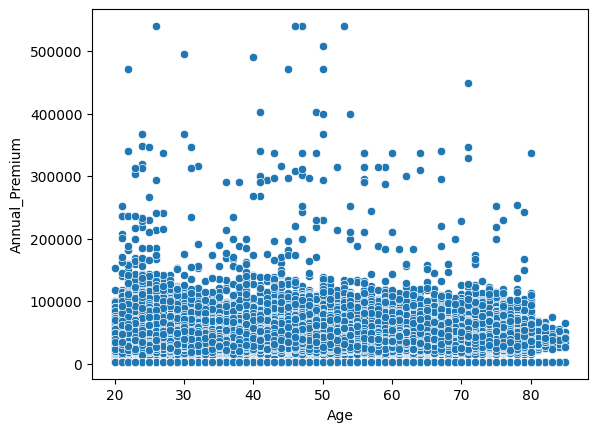

In [8]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])

In [10]:
data['Annual_Premium'] = data['Annual_Premium']*0.012


In [26]:
min(data['Annual_Premium'])

31.560000000000002

<Axes: xlabel='Annual_Premium', ylabel='Count'>

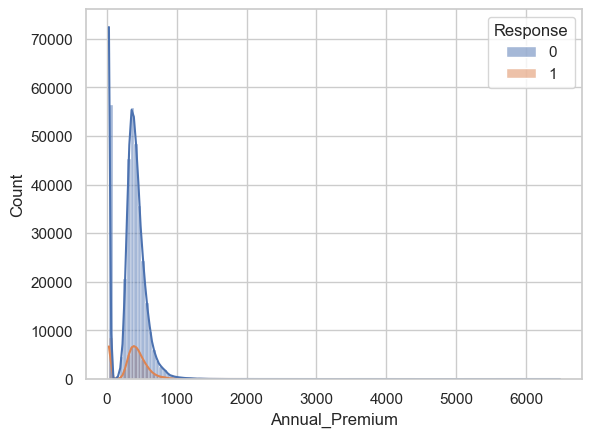

In [25]:
sns.histplot(data=data, x='Annual_Premium', bins=125, hue='Response', kde=True)

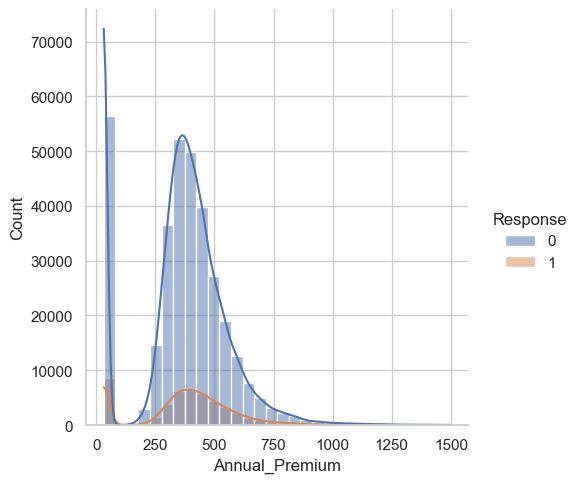

In [37]:
absurd_prem = data[data['Annual_Premium']<1500]
sns.displot(absurd_prem, x='Annual_Premium', bins=30, hue="Response", kde=True)

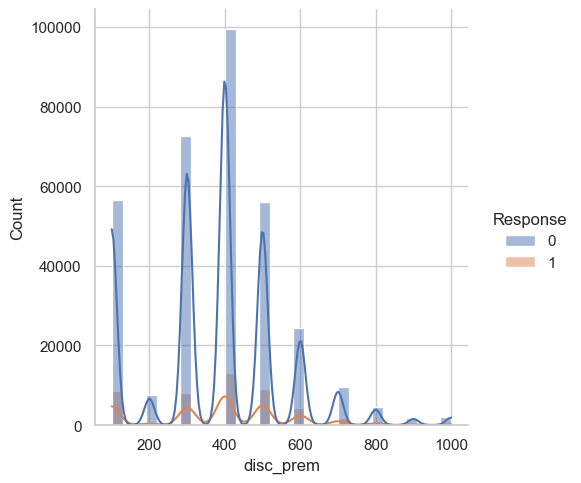

In [29]:
data['disc_prem'] = [max(round(x, -2), 100) if round(x, -2) < 1000 else 1000 for x in data['Annual_Premium']]
sns.displot(data, x='disc_prem', bins=30, hue="Response", kde=True)


We can see that there are some extreme outliers in term of premium(our treatment)

In [36]:
# print(data['Response'].value_counts())
# print(data['Response'].value_counts(normalize=True))

# Data Processing

1. Change the categorical columns to object
2. Change the unit of currency to Dollar
3. Remove the Outliers(?) not sure if this is a appropriote thing to do for prescriptive analysis

In [5]:
# Bin_Ord_col = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age']

# gender = {'Male': 0, 'Female': 1}
# driving_license = {0: 0, 1: 1}
# previously_insured = {0: 1, 1: 0}
# vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
# vehicle_damage = {'Yes': 1, 'No': 0}

# data['Gender'] = data['Gender'].map(gender)
# data['Driving_License'] = data['Driving_License'].map(driving_license)
# data['Previously_Insured'] = data['Previously_Insured'].map(previously_insured)
# data['Vehicle_Age'] = data['Vehicle_Age'].map(vehicle_age)
# data['Vehicle_Damage'] = data['Vehicle_Damage'].map(vehicle_damage)

data['Vehicle_Age']=data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})
data['Vehicle_Damage']=data['Vehicle_Damage'].replace({'Yes':1,'No':0})
data['Annual_Premium'] = data['Annual_Premium']*0.012
Cat_col = ['Region_Code', 'Policy_Sales_Channel','Response']
for col in Cat_col:
    data[col]=data[col].astype('category')

# Analysis After Prescriptive

<Axes: xlabel='Annual_Premium'>

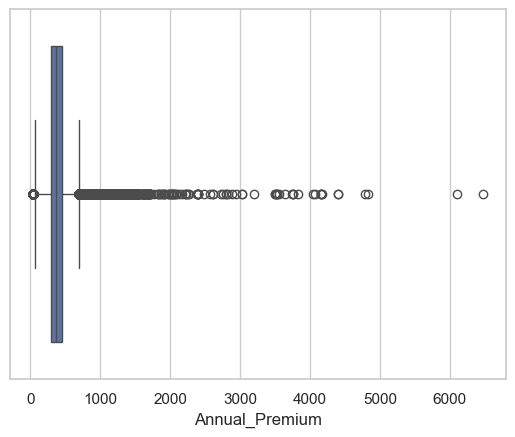

In [6]:
# Previously_Insured > 0.5
plot_this = data[data['Previously_Insured']>0.5]
#sns.displot(plot_this, x='Annual_Premium', bins=30, kde=True)

sns.boxplot(plot_this, x='Annual_Premium')

In [7]:
quantiles = data['Annual_Premium'].quantile([0.25, 0.5, 0.75])
quantiles

0.25    292.860
0.50    380.028
0.75    472.800
Name: Annual_Premium, dtype: float64

In [18]:
# 1958 people >= 1000, 1648 didnot buy, 310 did buy
print(data[data['Annual_Premium']>=1000]['Response'].value_counts())
data[data['Annual_Premium']>=1000]['Response'].value_counts(normalize=True)

Response
0    1648
1     310
Name: count, dtype: int64


Response
0    0.841675
1    0.158325
Name: proportion, dtype: float64

# Predictive Modeling

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [116]:
feature_names= ['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
X = data[feature_names]
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [124]:
print(len(y_test))
print(len(X_test))
y_test.value_counts()

114333
114333


Response
0    100195
1     14138
Name: count, dtype: int64

In [96]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = logreg.coef_
intercept = logreg.intercept_

# Display the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

Coefficients: [[ 1.05492290e-01 -2.16210921e-02 -1.32177098e+00  8.77855264e-05
  -3.39966856e+00  7.41031753e-01  2.05205931e+00  1.23731378e-04
  -2.75985779e-03 -2.95308198e-05]]
Intercept: [-1.39794386]


C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.277764
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               266776
Model:                          Logit   Df Residuals:                   266766
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 Nov 2023   Pseudo R-squ.:                  0.2515
Time:                        23:33:05   Log-Likelihood:                -74101.
converged:                       True   LL-Null:                       -98995.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                   0.0821      0.013      6.217      0.000       0.056       0.10

In [118]:
y_pred = logit_model.predict(X_test);
accuracy = accuracy_score(y_test, y_pred);
accuracy

ValueError: shapes (266776,10) and (114333,10) not aligned: 10 (dim 1) != 114333 (dim 0)

In [110]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train,y_train)

C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [111]:
y_pred = tree.predict(X_test);

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred);
print(f"Accuracy: {accuracy:.2f}")
np.unique(y_pred, return_counts=True)

Accuracy: 0.88


C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\nuobe\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

(array([0], dtype=int64), array([114333], dtype=int64))

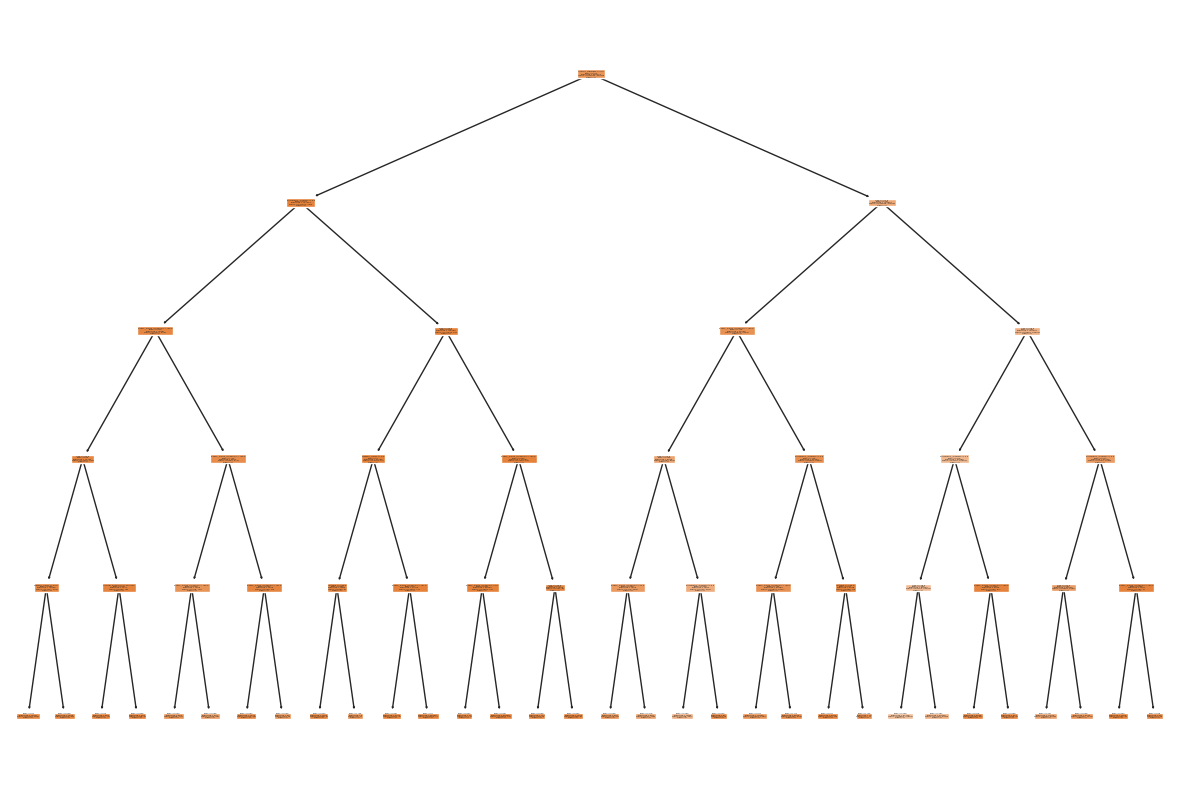

In [112]:
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=feature_names, class_names=['0', '1'])
plt.show()

In [58]:
prescription = pd.read_csv("prescription.csv")

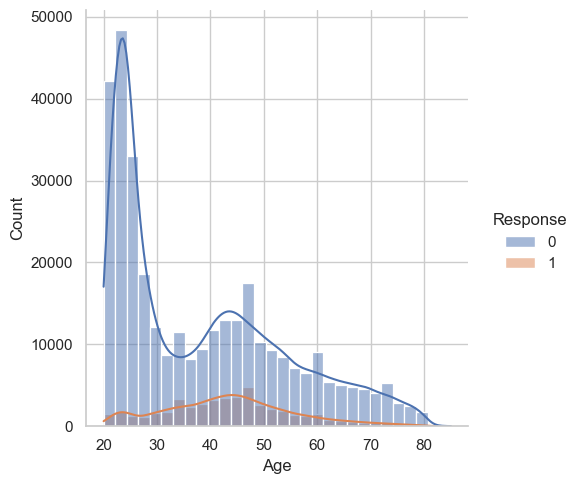

In [31]:
# sns.displot(prescription['Age'])
sns.displot(data, x='Age', bins=30, hue="Response", kde=True)

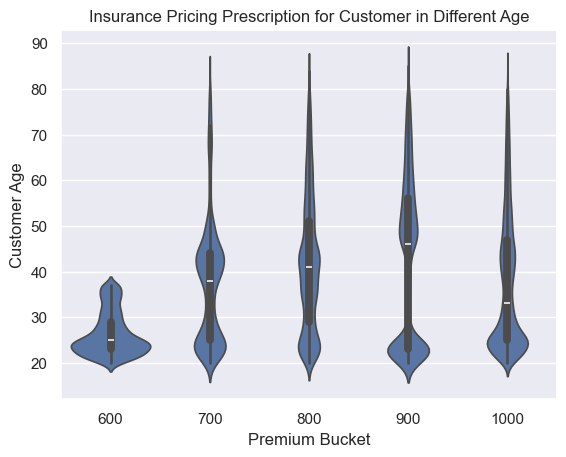

In [65]:
sns.set(style="darkgrid")
ax = sns.violinplot(x=prescription['x1'],y=prescription['Age'])
ax.set(xlabel='Premium Bucket', ylabel='Customer Age', title='Insurance Pricing Prescription for Customer in Different Age')
ax.figure.savefig('prem_age.png')

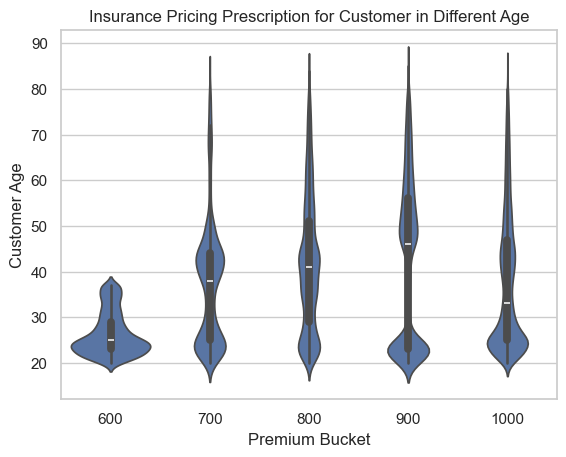

In [61]:
ax = sns.violinplot(x=prescription['x1'],y=prescription['Age'])
ax.set(xlabel='Premium Bucket', ylabel='Customer Age', title='Insurance Pricing Prescription for Customer in Different Age')
ax.figure.savefig('prem_age.png')

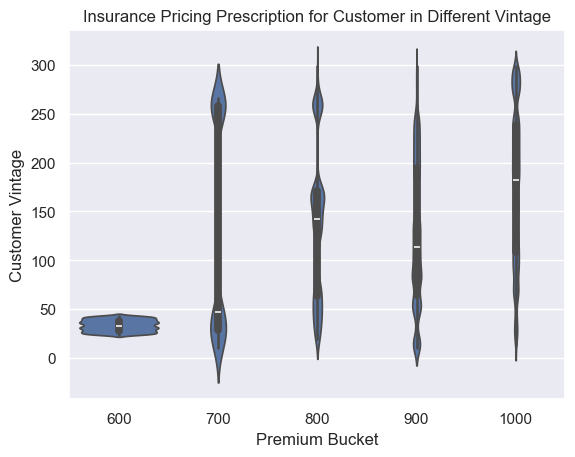

In [66]:
sns.set(style="darkgrid")
ax = sns.violinplot(x=prescription['x1'],y=prescription['Vintage'])
ax.set(xlabel='Premium Bucket', ylabel='Customer Vintage', title='Insurance Pricing Prescription for Customer in Different Vintage')
ax.figure.savefig('prem_vintage.png')